# Laboratorio 5
### Minería de texto
- Daniel Gomez 21429
- Abner Garcia 21285

### Inciso 1
Descargue el archivo train.csv

In [48]:
import pandas as pd
from ydata_profiling import ProfileReport
import pandas as pd
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

### Inciso 2
Cargue los archivos de datos a R o a Python, dependiendo de con qué trabaje.

In [49]:
train = pd.read_csv('./data/train.csv')

In [50]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [51]:
train.describe()

,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


### Inciso 3
Limpie y preprocese los datos. Describa de forma detallada las actividades de preprocesamiento que llevó a cabo.
3.1. Se pueden hacer tareas como:
- Convertir el texto a mayúsculas o a minúsculas
- Quitar los caracteres especiales que aparecen como “#”,”@” o los apóstrofes.
- Quitar las url
- Revisar si hay emoticones y quitarlos
- Quitar los signos de puntuación
- Quitar los artículos, preposiciones y conjunciones (stopwords)
- Quitar números si considera que interferirá en la clasificación (quizá debería valorar si quitar o no el 911).


Convertir el texto a mayúsculas o a minúsculas

In [52]:
# Convertir el texto a minúsculas
train = train.apply(lambda x: x.astype(str).str.lower() if x.dtype == "object" else x)

# imprimir data set
print(train)

         id keyword location  \
0         1     nan      nan   
1         4     nan      nan   
2         5     nan      nan   
3         6     nan      nan   
4         7     nan      nan   
...     ...     ...      ...   
7608  10869     nan      nan   
7609  10870     nan      nan   
7610  10871     nan      nan   
7611  10872     nan      nan   
7612  10873     nan      nan   

                                                   text  target  
0     our deeds are the reason of this #earthquake m...       1  
1                forest fire near la ronge sask. canada       1  
2     all residents asked to 'shelter in place' are ...       1  
3     13,000 people receive #wildfires evacuation or...       1  
4     just got sent this photo from ruby #alaska as ...       1  
...                                                 ...     ...  
7608  two giant cranes holding a bridge collapse int...       1  
7609  @aria_ahrary @thetawniest the out of control w...       1  
7610  m1.94 [01:04 ut

Quitar los caracteres especiales que aparecen como “#”,”@” o los apóstrofes

In [53]:
# Quitando los carateres especiales como #, @ o apostrofes
def clean_text(text):
    if isinstance(text, str):
       # eliminando caracteres especiales
         cleaned_text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
         return cleaned_text
    else:
        return text
  
# Aplicando la función clean_text a la columna text
train = train.applymap(clean_text)

# imprimir data set
print(train)

         id keyword location  \
0         1     nan      nan   
1         4     nan      nan   
2         5     nan      nan   
3         6     nan      nan   
4         7     nan      nan   
...     ...     ...      ...   
7608  10869     nan      nan   
7609  10870     nan      nan   
7610  10871     nan      nan   
7611  10872     nan      nan   
7612  10873     nan      nan   

                                                   text  target  
0     our deeds are the reason of this earthquake ma...       1  
1                 forest fire near la ronge sask canada       1  
2     all residents asked to shelter in place are be...       1  
3     13000 people receive wildfires evacuation orde...       1  
4     just got sent this photo from ruby alaska as s...       1  
...                                                 ...     ...  
7608  two giant cranes holding a bridge collapse int...       1  
7609  ariaahrary thetawniest the out of control wild...       1  
7610  m194 0104 utc5k

C:\Users\Personal\AppData\Local\Temp\ipykernel_16476\2091921618.py:11: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  train = train.applymap(clean_text)


Describiendo los datos para validar que todo haya quedad con el formato correcto.

In [54]:
# Obteneniendo estadísticas sobre las longitudes de los textos en la columna "keyword"
train['tweet_length'] = train['text'].apply(len)  # Agregando una columna con las longitudes de los textos
text_stats = train['tweet_length'].describe()

# Obteneniedo la cantidad de categorías únicas en la columna "location"
location_unique_count = train['location'].nunique()

# Imprimiendo las estadísticas de longitud de textos y la cantidad de categorías únicas en la ubicación
print("Estadísticas de longitud de textos:\n", text_stats)
print("\nCantidad de categorías únicas en base al texto:", location_unique_count)

Estadísticas de longitud de textos:
 count    7613.000000
mean       94.023512
std        31.774947
min         6.000000
25%        71.000000
50%        99.000000
75%       123.000000
max       148.000000
Name: tweet_length, dtype: float64

Cantidad de categorías únicas en base al texto: 3129


Diseñando estadísticas del data set y aplicando palabras más frecuentes en el csv

Estadísticas de longitud de textos:
 count    7613.000000
mean        8.533824
std         3.208316
min         3.000000
25%         6.000000
50%         8.000000
75%        10.000000
max        20.000000
Name: tweet_length, dtype: float64

Cantidad de categorías únicas en la ubicación: 3129
Estadísticas de longitud de textos:
 count    7613.000000
mean        8.533824
std         3.208316
min         3.000000
25%         6.000000
50%         8.000000
75%        10.000000
max        20.000000
Name: tweet_length, dtype: float64

Cantidad de categorías únicas en base al texto: 3129


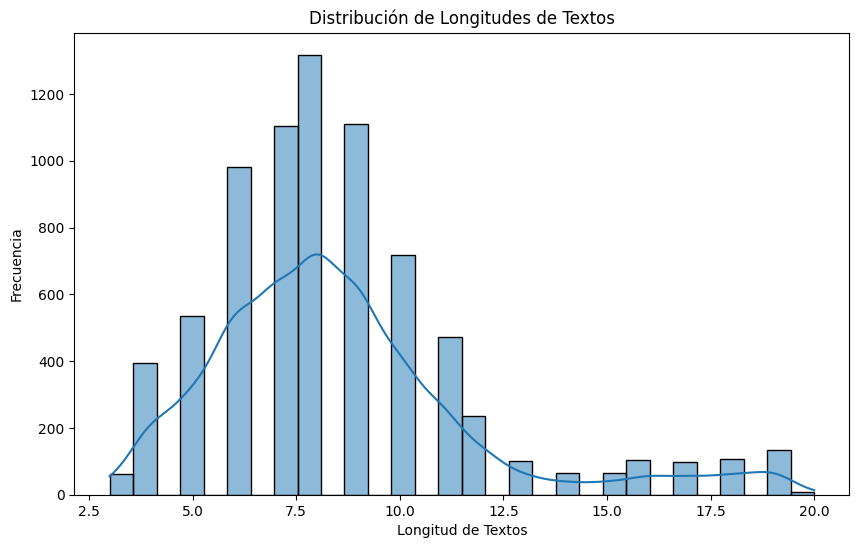

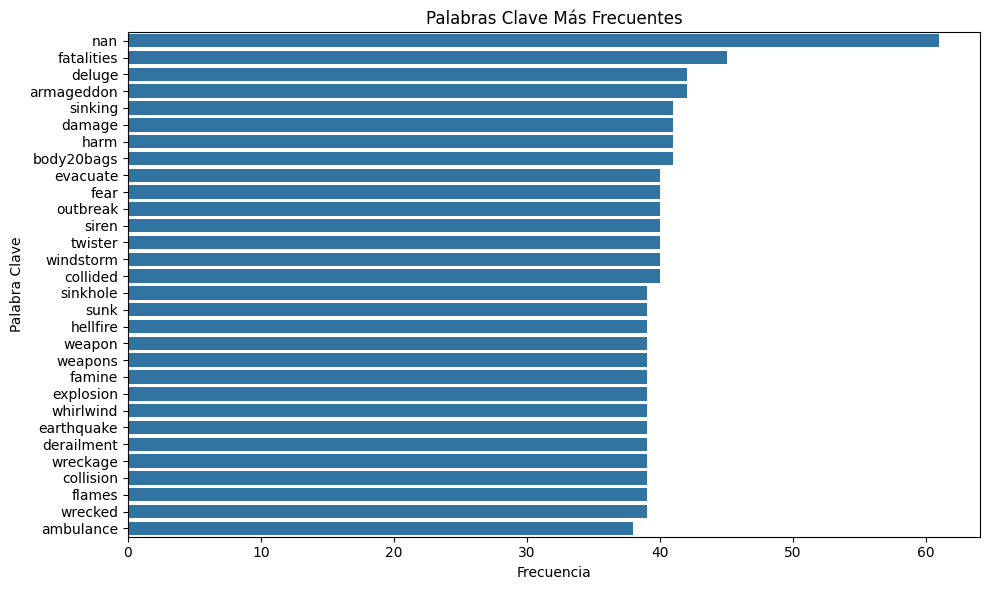

In [55]:
%matplotlib inline
# Obteneniendo estadísticas sobre las longitudes de los textos en la columna "keyword"
train['tweet_length'] = train['keyword'].apply(len)  # Agregando una columna con las longitudes de los textos
text_stats = train['tweet_length'].describe() # Obteniendo estadísticas sobre las longitudes de los textos en la columna "keyword"

# Obteneniedo la cantidad de categorías únicas en la columna "location"
location_unique_count = train['location'].nunique()

# Imprimiendo las estadísticas de longitud de textos y la cantidad de categorías únicas en la ubicación
print("Estadísticas de longitud de textos:\n", text_stats)
print("\nCantidad de categorías únicas en la ubicación:", location_unique_count)

# Obteneniedo la cantidad de categorías únicas en la columna "location"
location_unique_count = train['location'].nunique()

# Imprimiendo las estadísticas de longitud de textos y la cantidad de categorías únicas en la ubicación
print("Estadísticas de longitud de textos:\n", text_stats)
print("\nCantidad de categorías únicas en base al texto:", location_unique_count)


# Gráfico de histograma de longitudes de textos
plt.figure(figsize=(10, 6))
sns.histplot(train['tweet_length'], bins=30, kde=True)
plt.title('Distribución de Longitudes de Textos')
plt.xlabel('Longitud de Textos')
plt.ylabel('Frecuencia')
plt.show()


# Calcular la frecuencia de las palabras clave
keyword_freq = train['keyword'].value_counts()

# Seleccionar las palabras clave más frecuentes.
top_keywords = keyword_freq.head(30)

# Crear un gráfico de barras de las palabras clave más frecuentes
plt.figure(figsize=(10, 6))
sns.barplot(x=top_keywords.values, y=top_keywords.index)
plt.title('Palabras Clave Más Frecuentes')
plt.xlabel('Frecuencia')
plt.ylabel('Palabra Clave')
plt.tight_layout()
plt.show()

### Inciso 4
Obtenga la frecuencia de las palabras tanto de los tweets de desastres como de los que no. ¿Qué palabras cree que le servirán para hacer un mejor modelo de clasificación?¿Vale la pena explorar bigramas o trigramas para analizar el contexto?

In [56]:
# Obtener la frecuencia de las palabras en los tweets de desastres
disaster_tweets = train[train['target'] == 1]['text']
disaster_tweets = disaster_tweets.str.split(expand=True).stack().value_counts()
disaster_tweets

the                  1362
in                   1161
of                    927
a                     926
to                    757
                     ... 
httptco7giglwdmhy       1
medic                   1
ethereal7               1
jeesss                  1
httptcoymy4rskq3d       1
Name: count, Length: 11848, dtype: int64

In [57]:
# Obtener la frecuencia de las palabras en los tweets que no son de desastres
non_disaster_tweets = train[train['target'] == 0]['text']
non_disaster_tweets = non_disaster_tweets.str.split(expand=True).stack().value_counts()
non_disaster_tweets

the                   1909
a                     1257
to                    1189
i                     1078
and                    918
                      ... 
electro                  1
violin                   1
psalm3422                1
joshacagan               1
httpstcotfgrayudc5       1
Name: count, Length: 14623, dtype: int64

### Inciso 5
Haga un análisis exploratorio de los datos para entenderlos mejor, documente todos los análisis

In [58]:
train = pd.read_csv('./data/train.csv')
analysis = ProfileReport(train)
analysis.to_file('analysis.html')

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 105.53it/s]


### Inciso 6
Elabore varios modelos de clasificación para determinar si un tweet se refiere a un desastre real o no. ¿Cómo planea abordar el contexto? Explique. Puede utilizar varios algoritmos para probar modelos.

In [59]:
# model 1
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Cargar el dataset
train = pd.read_csv('./data/train.csv')

# Dividir el dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(train['text'], train['target'], test_size=0.2, random_state=42)

# Crear un objeto CountVectorizer
vectorizer = CountVectorizer()

# Ajustar el vectorizador y transformar los datos de entrenamiento
X_train_vectorized = vectorizer.fit_transform(X_train)

# Inicializar el modelo de regresión logística
model1 = LogisticRegression()

# Ajustar el modelo a los datos de entrenamiento
model1.fit(X_train_vectorized, y_train)

# Transformar los datos de prueba
X_test_vectorized = vectorizer.transform(X_test)

# Realizar predicciones
predictions = model1.predict(X_test_vectorized)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, predictions)
print("Precisión del modelo 1:", accuracy)



Precisión del modelo 1: 0.8102429415627052


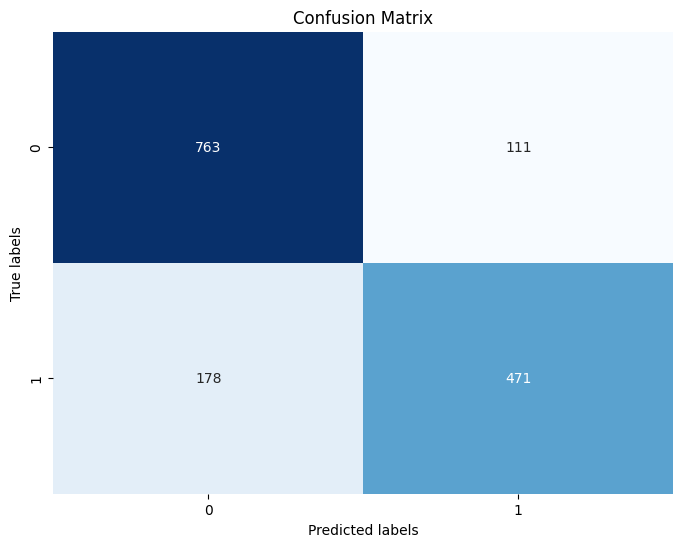

In [60]:
# show predicionts in graph
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Crear una matriz de confusión
cm = confusion_matrix(y_test, predictions)

# Crear un mapa de calor de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

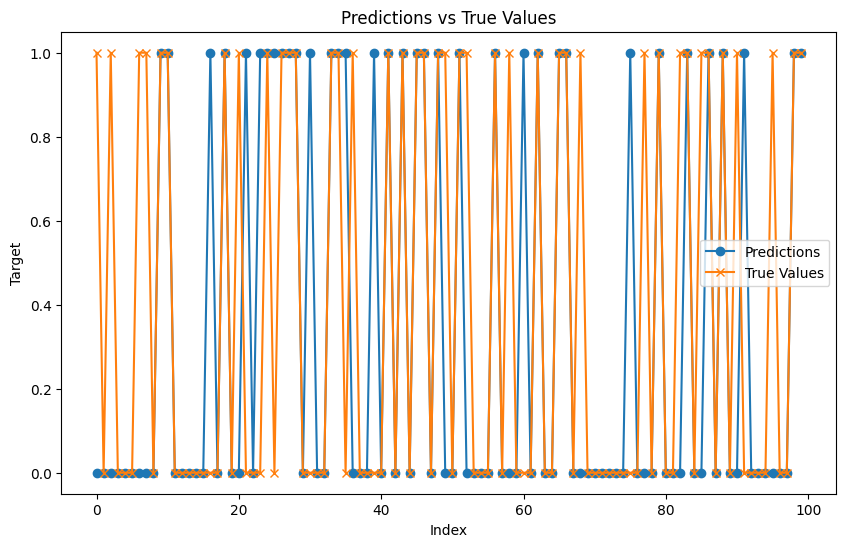

In [61]:
# graph results on a grap
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Crear un grafico en lineas de las predicciones vs los valores reales
plt.figure(figsize=(10, 6))
plt.plot(predictions[:100], label='Predictions', marker='o')
plt.plot(y_test.values[:100], label='True Values', marker='x')
plt.title('Predictions vs True Values')
plt.xlabel('Index')
plt.ylabel('Target')
plt.legend()
plt.show()

In [62]:
# use bigrams to abord context for model 2
# Crear un objeto CountVectorizer con bigramas
vectorizer = CountVectorizer(ngram_range=(1, 2))

# Ajustar el vectorizador y transformar los datos de entrenamiento
X_train_vectorized = vectorizer.fit_transform(X_train)

# Inicializar el modelo de regresión logística
model2 = LogisticRegression()

# Ajustar el modelo a los datos de entrenamiento
model2.fit(X_train_vectorized, y_train)

# Transformar los datos de prueba
X_test_vectorized = vectorizer.transform(X_test)

# Realizar predicciones
predictions = model2.predict(X_test_vectorized)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, predictions)
print("Precisión del modelo 2:", accuracy)

Precisión del modelo 2: 0.8076165462902167


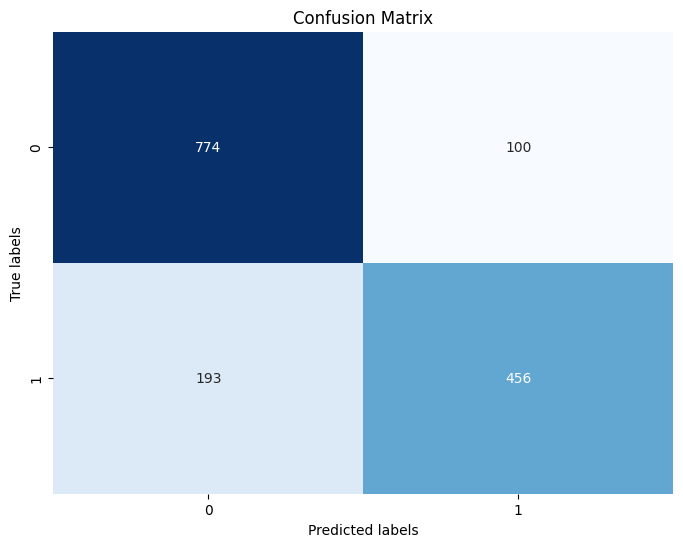

In [63]:
# Crear una matriz de confusión
cm = confusion_matrix(y_test, predictions)

# Crear un mapa de calor de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

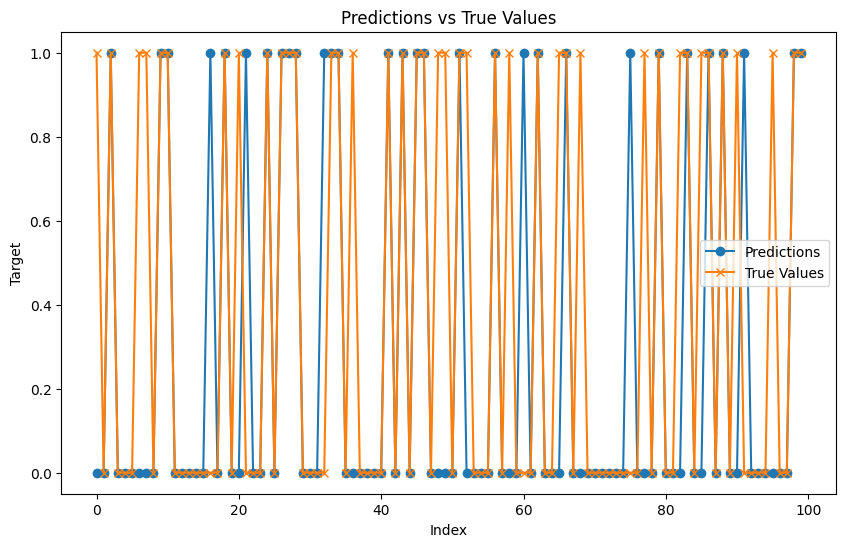

In [64]:
# Crear un grafico en lineas de las predicciones vs los valores reales
plt.figure(figsize=(10, 6))
plt.plot(predictions[:100], label='Predictions', marker='o')
plt.plot(y_test.values[:100], label='True Values', marker='x')
plt.title('Predictions vs True Values')
plt.xlabel('Index')
plt.ylabel('Target')
plt.legend()
plt.show()

In [65]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

# Load and preprocess the data
def load_and_preprocess_data(file_path):
    df = pd.read_csv(file_path)
    df = df[['text', 'target']]
    df['text'] = df['text'].apply(preprocess_text)
    return df

def preprocess_text(text):
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'\@\w+|\#', '', text)
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

# Create and evaluate model
def create_and_evaluate_model(X_train, X_test, y_train, y_test, ngram_range):
    vectorizer = CountVectorizer(ngram_range=ngram_range)
    X_train_vectorized = vectorizer.fit_transform(X_train)
    X_test_vectorized = vectorizer.transform(X_test)

    model = MultinomialNB()
    model.fit(X_train_vectorized, y_train)

    y_pred = model.predict(X_test_vectorized)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    return accuracy, report

file_path = './data/train.csv'  # Replace with your actual file path
df = load_and_preprocess_data(file_path)

X = df['text']
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Bigram model
print("Bigram Model:")
bigram_accuracy, bigram_report = create_and_evaluate_model(X_train, X_test, y_train, y_test, (1, 2))
print(f"Accuracy: {bigram_accuracy}")
print("Classification Report:")
print(bigram_report)

# Trigram model
print("\nTrigram Model:")
trigram_accuracy, trigram_report = create_and_evaluate_model(X_train, X_test, y_train, y_test, (1, 3))
print(f"Accuracy: {trigram_accuracy}")
print("Classification Report:")
print(trigram_report)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Personal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Bigram Model:
Accuracy: 0.7971109652002626
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       874
           1       0.79      0.71      0.75       649

    accuracy                           0.80      1523
   macro avg       0.80      0.79      0.79      1523
weighted avg       0.80      0.80      0.80      1523


Trigram Model:
Accuracy: 0.7971109652002626
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       874
           1       0.79      0.71      0.75       649

    accuracy                           0.80      1523
   macro avg       0.80      0.79      0.79      1523
weighted avg       0.80      0.80      0.80      1523



In [75]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

def create_and_evaluate_model(X_train, X_test, y_train, y_test, ngram_range):
    # Crear el vectorizador
    vectorizer = CountVectorizer(ngram_range=ngram_range)
    X_train_vec = vectorizer.fit_transform(X_train)
    X_test_vec = vectorizer.transform(X_test)
    
    # Crear y entrenar el modelo
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train_vec, y_train)
    
    # Hacer predicciones
    y_pred = model.predict(X_test_vec)
    
    # Calcular la precisión y el reporte de clasificación
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    return y_test, y_pred, accuracy, report

Bigram Model:
Accuracy: 0.8056467498358503
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       874
           1       0.82      0.69      0.75       649

    accuracy                           0.81      1523
   macro avg       0.81      0.79      0.80      1523
weighted avg       0.81      0.81      0.80      1523



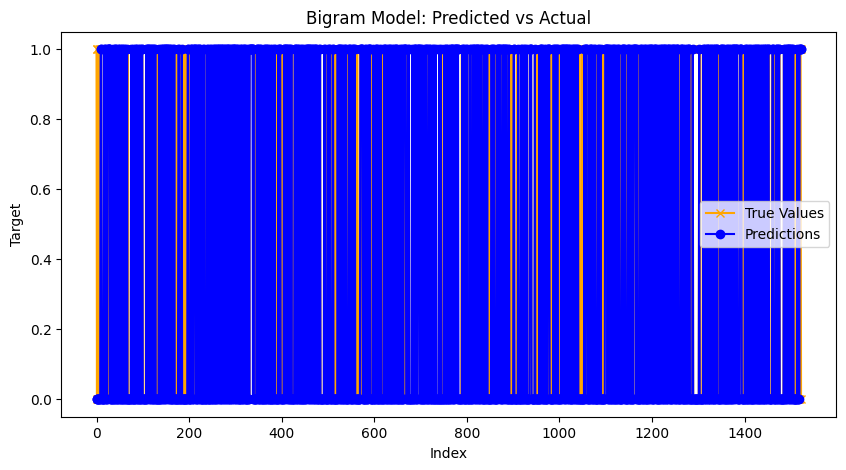


Trigram Model:
Accuracy: 0.8049901510177282
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.90      0.84       874
           1       0.83      0.68      0.75       649

    accuracy                           0.80      1523
   macro avg       0.81      0.79      0.79      1523
weighted avg       0.81      0.80      0.80      1523



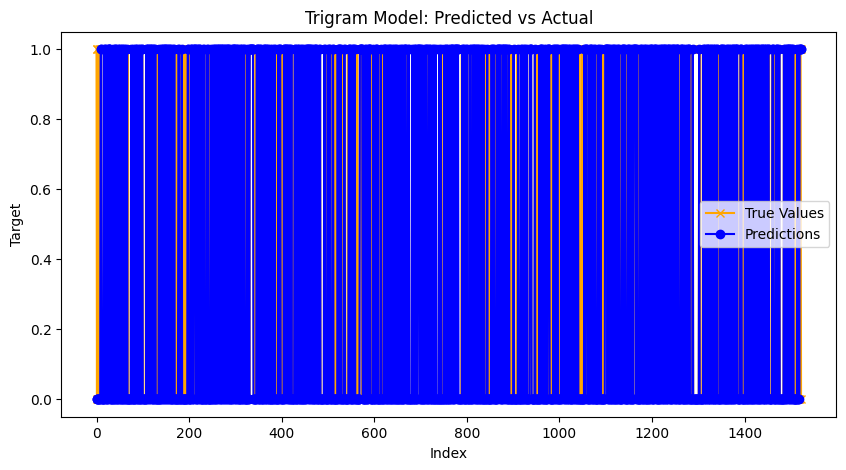

In [76]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Plot predicted vs actual labels as line graph
def plot_pred_vs_actual(y_test, y_pred, title):
    plt.figure(figsize=(10, 5))
    plt.plot(range(len(y_test)), y_test, label='True Values', linestyle='-', marker='x', color='orange')
    plt.plot(range(len(y_test)), y_pred, label='Predictions', linestyle='-', marker='o', color='blue')
    plt.xlabel('Index')
    plt.ylabel('Target')
    plt.title(title)
    plt.legend()
    plt.show()

file_path = './data/train.csv'  # Replace with your actual file path
df = load_and_preprocess_data(file_path)

X = df['text']
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Bigram model
print("Bigram Model:")
y_test_bigram, y_pred_bigram, bigram_accuracy, bigram_report = create_and_evaluate_model(X_train, X_test, y_train, y_test, (1, 2))
print(f"Accuracy: {bigram_accuracy}")
print("Classification Report:")
print(bigram_report)
plot_pred_vs_actual(y_test_bigram, y_pred_bigram, "Bigram Model: Predicted vs Actual")

# Trigram model
print("\nTrigram Model:")
y_test_trigram, y_pred_trigram, trigram_accuracy, trigram_report = create_and_evaluate_model(X_train, X_test, y_train, y_test, (1, 3))
print(f"Accuracy: {trigram_accuracy}")
print("Classification Report:")
print(trigram_report)
plot_pred_vs_actual(y_test_trigram, y_pred_trigram, "Trigram Model: Predicted vs Actual")

### Inciso 7

In [71]:
import joblib
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression

# Ajustar y guardar vectorizadores y modelos (esto se hace una vez con los datos de entrenamiento)
def train_and_save_models(X_train, y_train):
    vectorizer_bigram = CountVectorizer(ngram_range=(1, 2))
    vectorizer_trigram = CountVectorizer(ngram_range=(1, 3))
    
    X_train_bigram = vectorizer_bigram.fit_transform(X_train)
    X_train_trigram = vectorizer_trigram.fit_transform(X_train)
    
    model_bigram = LogisticRegression(max_iter=1000)
    model_trigram = LogisticRegression(max_iter=1000)
    
    model_bigram.fit(X_train_bigram, y_train)
    model_trigram.fit(X_train_trigram, y_train)
    
    # Guardar los objetos vectorizadores y modelos
    joblib.dump(vectorizer_bigram, 'vectorizer_bigram.pkl')
    joblib.dump(vectorizer_trigram, 'vectorizer_trigram.pkl')
    joblib.dump(model_bigram, 'model_bigram.pkl')
    joblib.dump(model_trigram, 'model_trigram.pkl')

train_and_save_models(X_train, y_train)

In [79]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
import re
import nltk
from nltk.corpus import stopwords
import joblib

# Descargar stopwords
nltk.download('stopwords')

# Preprocesamiento del texto
def preprocess_text(text):
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'\@\w+|\#', '', text)
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

# Cargar los modelos y vectorizadores
def load_models_and_vectorizers():
    # Cargar los vectorizadores y modelos entrenados
    vectorizer_bigram = joblib.load('vectorizer_bigram.pkl')
    vectorizer_trigram = joblib.load('vectorizer_trigram.pkl')
    model_bigram = joblib.load('model_bigram.pkl')
    model_trigram = joblib.load('model_trigram.pkl')
    
    return vectorizer_bigram, vectorizer_trigram, model_bigram, model_trigram

# Clasificar el tweet
def classify_tweet(tweet):
    # Preprocesar el tweet
    processed_tweet = preprocess_text(tweet)
    
    # Cargar los modelos y vectorizadores
    vectorizer_bigram, vectorizer_trigram, model_bigram, model_trigram = load_models_and_vectorizers()
    
    # Transformar el tweet usando bigramas y trigramas
    tweet_bigram = vectorizer_bigram.transform([processed_tweet])
    tweet_trigram = vectorizer_trigram.transform([processed_tweet])
    
    # Hacer predicciones
    prediction_bigram = model_bigram.predict(tweet_bigram)[0]
    prediction_trigram = model_trigram.predict(tweet_trigram)[0]
    
    # Mostrar resultados
    print("Predicción usando el modelo de bigramas:", "Desastre" if prediction_bigram == 1 else "No Desastre")
    print("Predicción usando el modelo de trigramas:", "Desastre" if prediction_trigram == 1 else "No Desastre")

# Ejemplo de uso
tweet_input = input("Ingrese un tweet para clasificar: ")
classify_tweet(tweet_input)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Personal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Predicción usando el modelo de bigramas: No Desastre
Predicción usando el modelo de trigramas: No Desastre
